# 3. Data Analysis

# I - Setup

In [14]:
# Import of librairies

import mysql.connector as mariadb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
justiceclass sql_query:
    def __init__(self, credentials_path):
        self.db_credentials = pd.read_csv(credentials_path, index_col="Field")
      
    
    def __call__(self, query):
        
        mariadb_connection = mariadb.connect(
            user=self.db_credentials.loc["user"][0],
            password=self.db_credentials.loc["password"][0],
            host=self.db_credentials.loc["host"][0],
            port=3306,
            db = "db_velib")
        
        self.cursor = mariadb_connection.cursor()
    
        cursor = self.cursor
        cursor.execute(query)
        field_names = [i[0] for i in cursor.description]
        df = pd.DataFrame(cursor, columns=field_names)
        return df

In [3]:
# Testing
request = sql_query("../../aws_mariadb_crendentials.csv")

query = """
SELECT DISTINCT * FROM velib_realtime
WHERE station_id = 9034 and date(data_actualisation)=date("2020-04-29")
ORDER BY data_actualisation DESC
"""

#request(query)

,station_id,operational_station,nb_free_docks,nb_total_free_bikes,nb_free_mechanical_bikes,nb_free_electrical_bikes,payment_totem,bike_return_possible,data_actualisation,date_of_update
0,9034,OUI,18,4,2,2,OUI,OUI,2020-04-29 23:09:00,2020-04-29 23:19:00
1,9034,OUI,18,4,2,2,OUI,OUI,2020-04-29 23:09:00,2020-04-30 00:18:00
2,9034,OUI,18,4,2,2,OUI,OUI,2020-04-29 23:09:00,2020-04-29 23:36:00
3,9034,OUI,18,4,2,2,OUI,OUI,2020-04-29 23:09:00,2020-04-29 23:37:00
4,9034,OUI,18,4,2,2,OUI,OUI,2020-04-29 23:09:00,2020-04-29 23:38:00
...,...,...,...,...,...,...,...,...,...,...
694,9034,OUI,9,12,7,5,OUI,OUI,2020-04-29 12:12:00,2020-04-29 13:03:00
695,9034,OUI,9,12,7,5,OUI,OUI,2020-04-29 12:12:00,2020-04-29 13:04:00
696,9034,OUI,9,12,7,5,OUI,OUI,2020-04-29 12:12:00,2020-04-29 13:05:00
697,9034,OUI,9,12,7,5,OUI,OUI,2020-04-29 12:12:00,2020-04-29 13:06:00


# II - Doing some visualisation

In [24]:
# Taking data from  station 9034 - Madeleine

query = """
SELECT DISTINCT * FROM velib_realtime
WHERE station_id = 9034
AND date_of_update > DATE("2020-05-05")
ORDER BY date_of_update DESC
"""

df = request(query)

In [25]:
df.head()

,station_id,operational_station,nb_free_docks,nb_total_free_bikes,nb_free_mechanical_bikes,nb_free_electrical_bikes,payment_totem,bike_return_possible,data_actualisation,date_of_update
0,9034,OUI,12,10,3,7,OUI,OUI,2020-05-06 11:36:06,2020-05-06 12:15:00
1,9034,OUI,12,10,3,7,OUI,OUI,2020-05-06 11:36:06,2020-05-06 12:14:00
2,9034,OUI,12,10,3,7,OUI,OUI,2020-05-06 11:36:06,2020-05-06 12:13:00
3,9034,OUI,12,10,3,7,OUI,OUI,2020-05-06 11:36:06,2020-05-06 12:12:00
4,9034,OUI,12,10,3,7,OUI,OUI,2020-05-06 11:36:06,2020-05-06 12:11:00


In [26]:
df.describe()

,station_id,nb_free_docks,nb_total_free_bikes,nb_free_mechanical_bikes,nb_free_electrical_bikes
count,2174.0,2174.000000,2174.000000,2174.000000,2174.000000
mean,9034.0,17.749310,4.250690,1.860166,2.390524
std,0.0,3.847554,3.847554,2.154575,1.901563
min,9034.0,9.000000,1.000000,0.000000,1.000000
25%,9034.0,13.000000,1.000000,0.000000,1.000000
50%,9034.0,20.000000,2.000000,1.000000,1.000000
75%,9034.0,21.000000,9.000000,3.000000,4.000000
max,9034.0,21.000000,13.000000,8.000000,7.000000


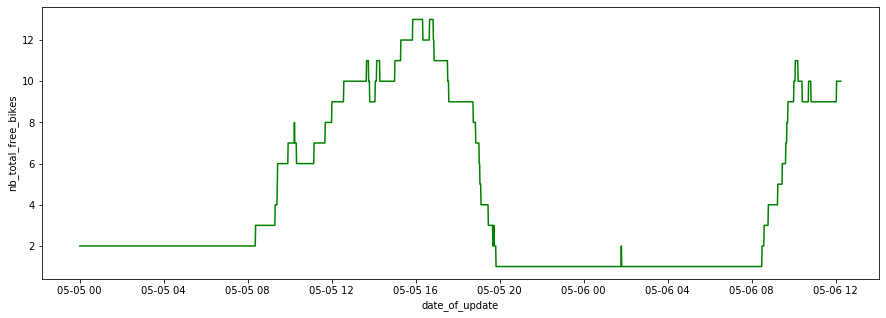

In [27]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(x="date_of_update", y="nb_total_free_bikes", data=df[["nb_total_free_bikes","date_of_update"]], color="green")
plt.show()